# The Sparks Foundation
# Data Science and Business Analytics Intern Task

## By Ghazali Akmal Rabbani
## Task 4

# Problem and Purpose

1. Create the Decision Tree classifier and visualize it graphically
2. The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly
3. Dataset : https://bit.lt/3kXTdox

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
df = pd.read_csv('Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


# Select all columns data except Id column

In [3]:
df = df.iloc[:, 1:]
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# Check Outliers for Each Feature Column

In [4]:
data_col_float = df.select_dtypes(include=['float64']).columns.tolist()
data_col_float

['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

In [5]:
def boxplot_numerical(numerical):
    plt.figure(figsize = (10, 6))
    sns.boxplot(df[numerical]).set_title(numerical)
    median = df[numerical].median()
    FirstQuartile = df[numerical].quantile(0.25)
    ThirdQuartile = df[numerical].quantile(0.75)
    Interquartile = scipy.stats.iqr(df[numerical])
    UpperFence = ThirdQuartile + (1.5*Interquartile)
    LowerFence = FirstQuartile - (1.5*Interquartile)

    print ('==================================')
    print ('Statistical Data Summary')
    print ('==================================')
    print ('Median : ', median)
    print ('1st Quartile : ', FirstQuartile)
    print ('3rd Quartile : ', ThirdQuartile)
    print ('IQR : ', Interquartile)
    print ('Upper Fence : ', UpperFence)
    print ('Lower Fence : ', LowerFence)
    print ('==================================')

    UpperOutliers = []
    LowerOutliers = []
    StatusUpperOutliers = False
    StatusLowerOutliers = False
    for x in df[numerical]:
      if (x > UpperFence):
        UpperOutliers.append(x)
        StatusUpperOutliers = True
      elif (x < LowerFence):
        LowerOutliers.append(x)
        StatusLowerOutliers = True
    print ()
    print ('==================================')
    print ('Outliers Data Detection')
    print ('==================================')
    print ('Upper Outliers Data : ', sorted(UpperOutliers, reverse=False))
    print ('Upper Outliers Status : ', StatusUpperOutliers)
    print ('Lower Outliers Data : ', sorted(LowerOutliers, reverse=False))
    print ('Lower Outliers Status : ', StatusLowerOutliers)

    plt.figure(figsize = (10, 6))
    sns.boxplot(df[numerical], showfliers = False).set_title(numerical + ' No Outliers')

## Sepal Length Outliers

Statistical Data Summary
Median :  5.8
1st Quartile :  5.1
3rd Quartile :  6.4
IQR :  1.3000000000000007
Upper Fence :  8.350000000000001
Lower Fence :  3.1499999999999986

Outliers Data Detection
Upper Outliers Data :  []
Upper Outliers Status :  False
Lower Outliers Data :  []
Lower Outliers Status :  False


C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


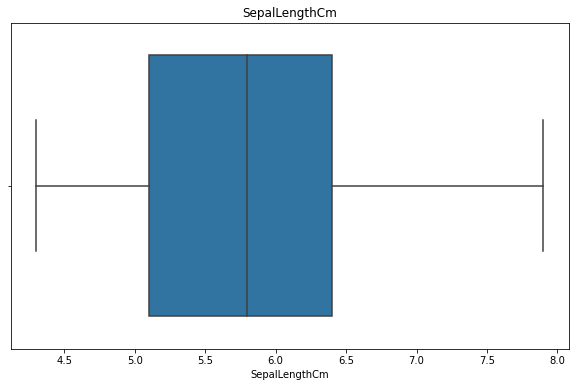

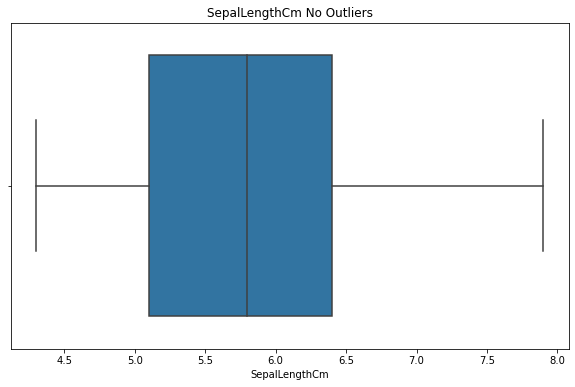

In [6]:
boxplot_numerical(data_col_float[0])

## Sepal Width Outliers

Statistical Data Summary
Median :  3.0
1st Quartile :  2.8
3rd Quartile :  3.3
IQR :  0.5
Upper Fence :  4.05
Lower Fence :  2.05

Outliers Data Detection
Upper Outliers Data :  [4.1, 4.2, 4.4]
Upper Outliers Status :  True
Lower Outliers Data :  [2.0]
Lower Outliers Status :  True


C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


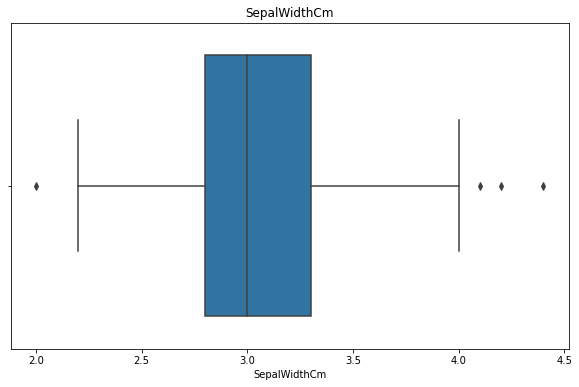

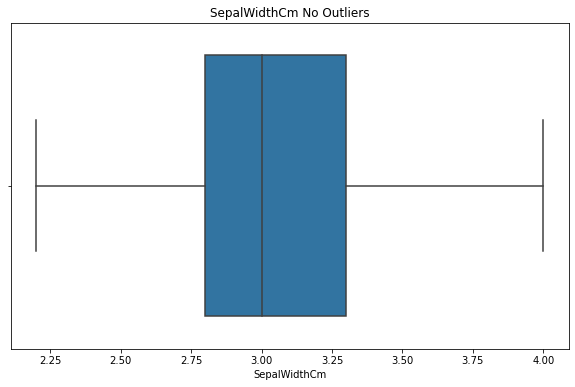

In [7]:
boxplot_numerical(data_col_float[1])

## Petal Length Outliers

Statistical Data Summary
Median :  4.35
1st Quartile :  1.6
3rd Quartile :  5.1
IQR :  3.4999999999999996
Upper Fence :  10.349999999999998
Lower Fence :  -3.649999999999999

Outliers Data Detection
Upper Outliers Data :  []
Upper Outliers Status :  False
Lower Outliers Data :  []
Lower Outliers Status :  False


C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


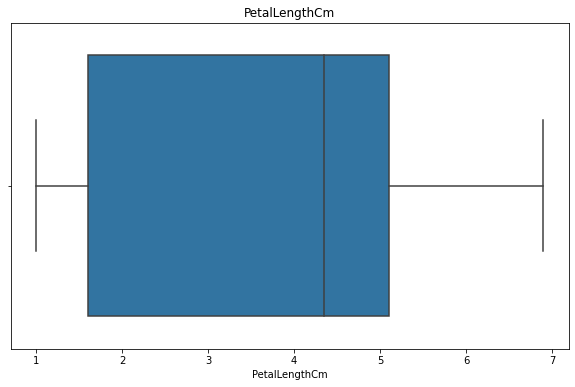

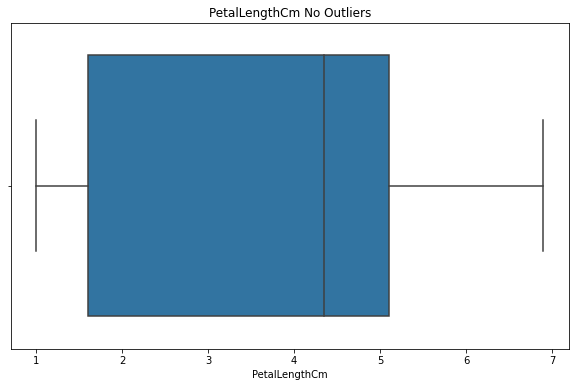

In [8]:
boxplot_numerical(data_col_float[2])

## Petal Width Outliers

Statistical Data Summary
Median :  1.3
1st Quartile :  0.3
3rd Quartile :  1.8
IQR :  1.5
Upper Fence :  4.05
Lower Fence :  -1.95

Outliers Data Detection
Upper Outliers Data :  []
Upper Outliers Status :  False
Lower Outliers Data :  []
Lower Outliers Status :  False


C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


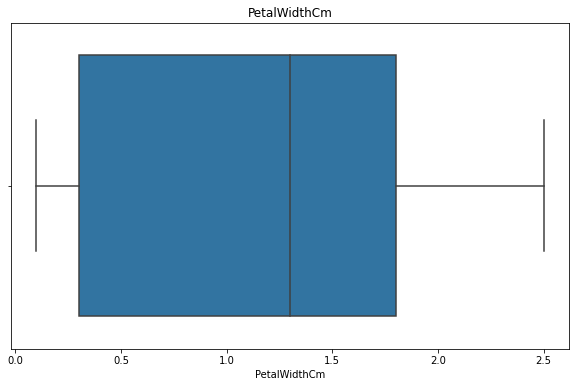

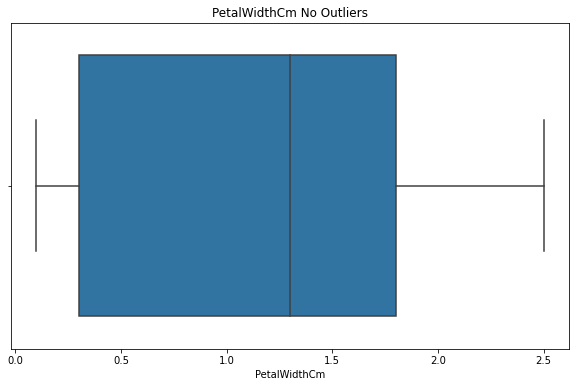

In [9]:
boxplot_numerical(data_col_float[3])

# Removing Outliers

## Get IQR for each column

Box plot use the IQR method to display data and outliers(shape of the data) but in order to be get a list of identified outlier, we will need to use the mathematical formula and retrieve the outlier data.

QR is somewhat similar to Z-score in terms of finding the distribution of data and then keeping some threshold to identify the outlier.

Let’s find out we can box plot uses IQR and how we can use it to find the list of outliers as we did using Z-score calculation. First we will calculate IQR,

In [10]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3-Q1
print(IQR)

SepalLengthCm    1.3
SepalWidthCm     0.5
PetalLengthCm    3.5
PetalWidthCm     1.5
dtype: float64


As we now have the IQR scores, it’s time to get hold on outliers. The below code will give an output with some true and false values. The data point where we have False that means these values are valid whereas True indicates presence of an outlier.

In [11]:
(df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))

<ipython-input-11-8665acf302a2>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  (df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))
<ipython-input-11-8665acf302a2>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  (df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))


,PetalLengthCm,PetalWidthCm,SepalLengthCm,SepalWidthCm,Species
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


## Remove Outliers

**Before Remove the Outliers**

In [12]:
df.shape

(150, 5)

In [13]:
df['Species'].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

**After Remove the Outliers**

In [14]:
dfNoOutliers = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

<ipython-input-14-bf9f396b48f0>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  dfNoOutliers = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
<ipython-input-14-bf9f396b48f0>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  dfNoOutliers = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]


In [15]:
dfNoOutliers.shape

(146, 5)

In [16]:
dfNoOutliers['Species'].value_counts()

Iris-virginica     50
Iris-versicolor    49
Iris-setosa        47
Name: Species, dtype: int64

# Label Encoding the Labels

In [17]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

dfNoOutliers.Species = le.fit_transform(dfNoOutliers.Species)

C:\anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [18]:
dfNoOutliers

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [19]:
dfNoOutliers['Species'].value_counts()

2    50
1    49
0    47
Name: Species, dtype: int64

1. Labels 2 is for **Iris-virginica**
2. Labels 1 is for **Iris-versicolor**
3. Labels 0 is for **Iris-setosa**

# Separate between Features and Labels

In [20]:
X = dfNoOutliers.iloc[:, :-1]
y = dfNoOutliers.iloc[:, -1]

In [21]:
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [22]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int32

# Train Test Split

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

# Train the Model

In [24]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [25]:
y_pred = model.predict(X_test)

# Evaluate the Model

In [26]:
y_test.value_counts()

1    17
2    15
0    12
Name: Species, dtype: int64

## Evaluation Metrics using Confusion Matrix

In [27]:
!pip install -q scikit-plot

<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

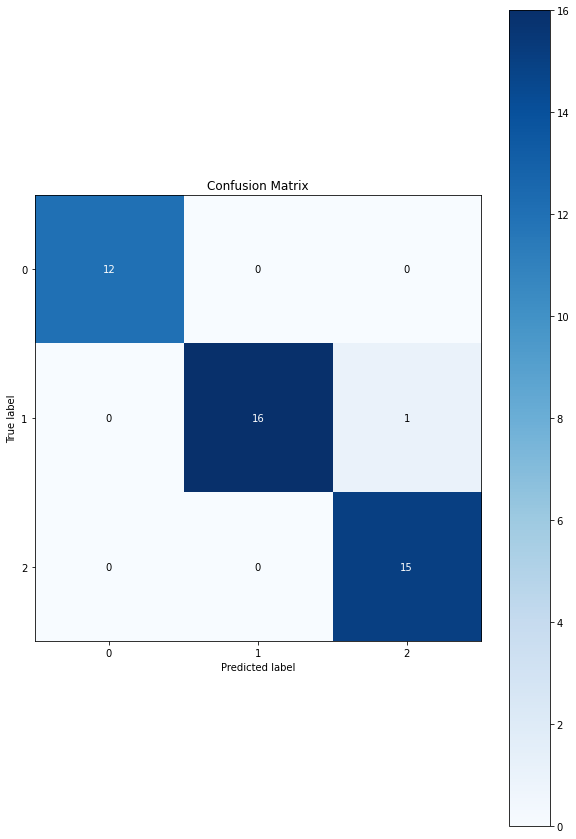

In [28]:
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(
    y_test,
    y_pred,
    figsize=(10,15)
)

## Evaluation Matrix using Classification Report

In [29]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.94      0.97        17
           2       0.94      1.00      0.97        15

    accuracy                           0.98        44
   macro avg       0.98      0.98      0.98        44
weighted avg       0.98      0.98      0.98        44



# Visualize the Decision Tree with Graph

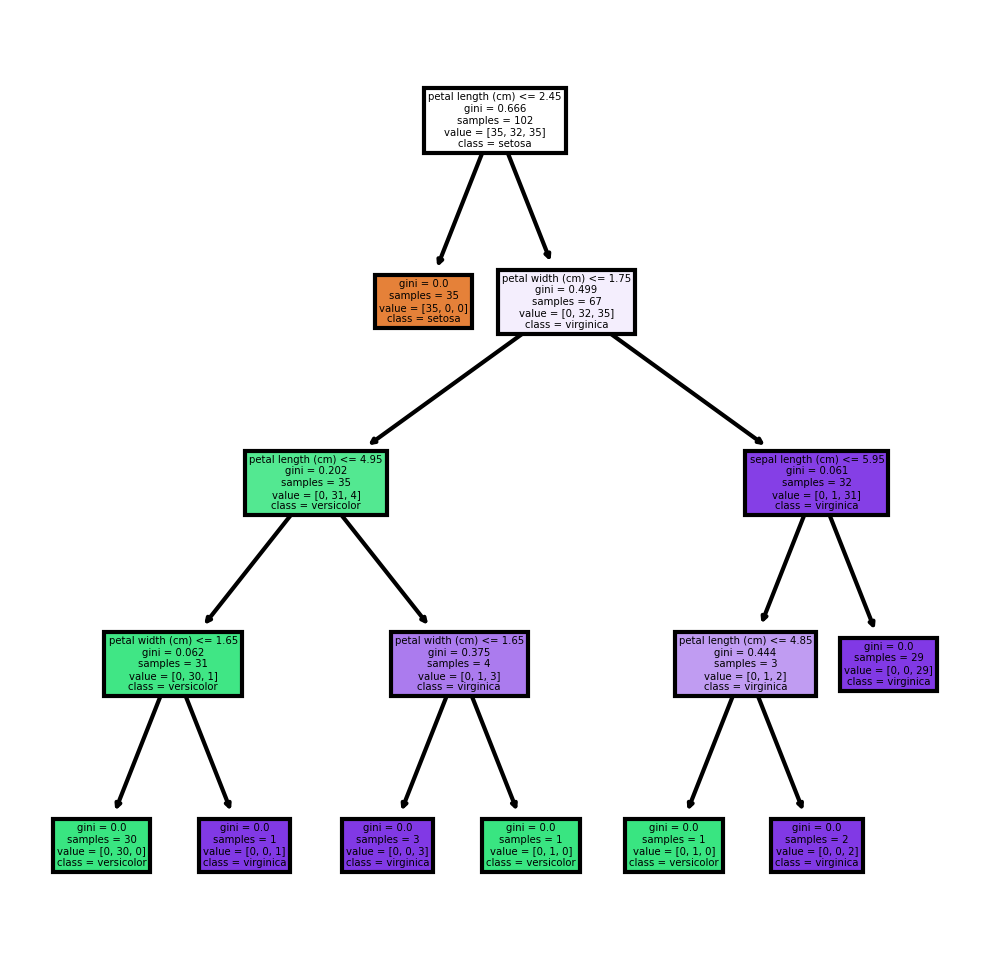

In [30]:
from sklearn import tree

fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa', 'versicolor', 'virginica']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

# Try to Feed New Data and Predict the Labels

In [31]:
def predictLabel(NewData):
    if(NewData==0):
        print('Label 0 or Iris-Setosa')
    elif(NewData==1):
        print('Label 1 or Iris-Versicolor')
    else:
        print('Label 2 or Iris-Virginica')

In [32]:
NewData = model.predict([[5.1, 3.5, 1.4, 0.2]])
predictLabel(NewData)
NewData = model.predict([[1, 2, 3, 4]])
predictLabel(NewData)
NewData = model.predict([[1, 1, 1, 1]])
predictLabel(NewData)

Label 0 or Iris-Setosa
Label 1 or Iris-Versicolor
Label 0 or Iris-Setosa
